<a href="https://colab.research.google.com/github/q1ngyM/Github_Colab/blob/main/Dict/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

为了**提高模型精度，加速模型收敛**，对数据进行归一化处理。
随机初始化一个权重向量和偏置。设置学习率，如设置为1。
从头遍历所有的样本点，计算每个样本点的特征向量w和权重矩阵x的内积，判断结果是大于0还是小于0（使用符号函数sign来计算），得到预测结果。找到第一个预测错误的样本，通过$$ W_{t+1}\leftarrow W_t+\eta y_ix_i $$，并且于已知的最好权重、偏置组合比较，更新权重向量，结束本轮遍历。
重复步骤，直到到达固定迭代次数。
训练结束后得到一个权重向量，通过这个权重矩阵和要预测的x做内积来预测它的标签。
如果要分析实验结果，则通过验证集统计标签预测正确的样例个数，计算准确率。

In [2]:
from google.colab import drive
import csv
# 获取多列的数据
with open('drive/MyDrive/Data/data.csv',encoding='utf-8') as data:
    reader = data.readlines()[1:]
    data_set = [l.rstrip().split(',') for l in reader]

data_set = np.array(data_set).astype(float)


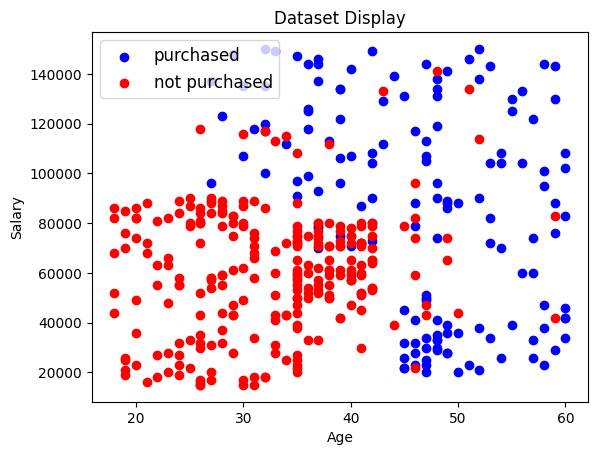

In [3]:
# 抽取样本，可视化

yes = [s for s in data_set if s[2] == 1]
yes = np.array(yes)
no = [s for s in data_set if s[2] == 0]
no = np.array(no)

plt.figure()
plt.title('Dataset Display')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(yes[:,0],yes[:,1],s=None,c='b',marker = 'o',label = 'purchased')
plt.scatter(no[:,0],no[:,1],s=None,c='r',marker = 'o',label = 'not purchased')
plt.legend(loc='best', prop={'size': 12})
plt.show()

In [5]:
# 最小-最大缩放归一化
# 计算最小值和最大值
min_values = data_set.min(axis=0)  # 每列的最小值
max_values = data_set.max(axis=0)  # 每列的最大值
restored_data_set = data_set

# 应用最小-最大缩放
data_set = (data_set - min_values) / (max_values - min_values)


In [9]:
# 获取训练集、测试集以及相应标签
X_train = data_set[:,:2]
y_train = data_set[:,2]

In [10]:
# Perceptron
class Perceptron():
  def __init__(self,X,y,lr):
    self.X = X
    self.y = y
    self.lr = lr # learning rate
    self.weight = np.zeros(self.X.shape[1]) # initiate a weight vector
    self.bias = 0

  def sign(self,y):
    return 1 if y>0 else -1

  def perceptron(self, epochs):
    weight = np.zeros(self.X.shape[1]) # initiate a weight vector
    bias = 0

    epoch = []
    loss = []

    count = 0
    mistake = True # check if mistake occurred
    best_loss = self.test(self.weight, self.bias)

    while mistake and count < epochs:
      # 每次都打乱读取X的顺序
      ord = list(range(len(self.X)))
      random.shuffle(ord)

      mistake = False
      count += 1
      for i in ord:
        if self.y[i] == 0:
          y = -1
        else:
          y = 1

        yhat = self.sign(np.dot(weight, self.X[i]) + bias)

        if y * yhat <= 0: # 判断二者是否异号
          weight += self.lr * np.dot(y , self.X[i]) # update weight
          bias += self.lr * y

          # 如果新的权重准确率比原本的权重更高，就更新被保存的权重。
          cur_loss = self.test(weight, bias)
          if(cur_loss <= best_loss):
            self.weight = weight
            self.bias = bias
            best_loss = cur_loss
          mistake = True

      epoch.append(float(count))
      loss.append(float(best_loss))
    print(loss)

    return weight, bias, epoch, loss

  def test(self, weight, bias):
    # The amount of wrong classification
    count = 0
    for i in range(len(self.X)):
      if self.y[i] == 0:
            _y = -1
      else:
            _y = 1
      if _y * (np.dot(weight, self.X[i]) + bias) <= 0:
        count += 1

    return count/(len(self.X))



In [26]:
def print_loss(epoch,loss,epochs,lr):
  plt.figure()
  plt.title(f'Loss(epoch={epochs},lr={lr})')
  plt.xlabel("iterations")
  plt.ylabel("loss")

  plt.plot(epoch, loss)
  plt.show()

[0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13]
[4.13333333 2.2162963 ] -3.2


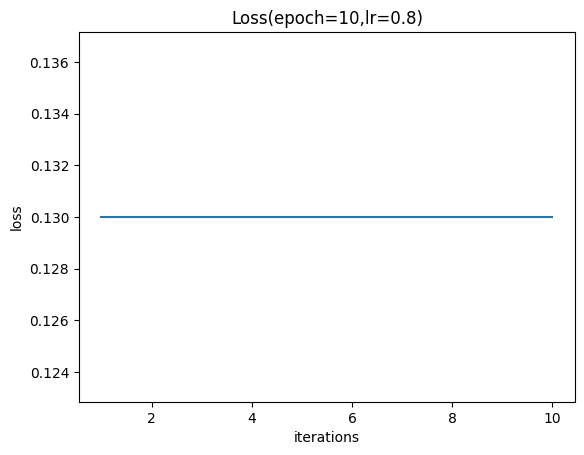

In [36]:
p = Perceptron(X_train, y_train, 0.8)
# epochs = 10
weight, bias, epoch, loss= p.perceptron(epochs=10)
print(weight,bias)
print_loss(epoch,loss,10,0.8)



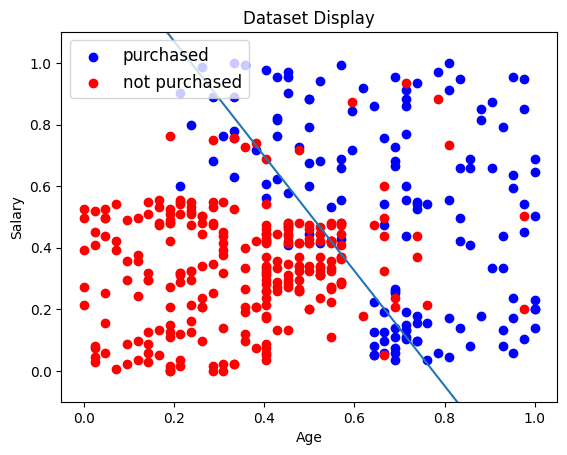

In [37]:

yes = [s for s in data_set if s[2] == 1]
yes = np.array(yes)
no = [s for s in data_set if s[2] == 0]
no = np.array(no)

plt.title('Dataset Display')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(yes[:,0],yes[:,1],s=None,c='b',marker = 'o',label = 'purchased')
plt.scatter(no[:,0],no[:,1],s=None,c='r',marker = 'o',label = 'not purchased')
plt.legend(loc='best', prop={'size': 12})


x = np.linspace(0, 1,10)
y = -(weight[0]*x + bias)/weight[1]
plt.ylim(-0.1, 1.1)
plt.plot(x, y)
